In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm_notebook as tqdm

gold = 8.*np.array([1,1/((1+np.sqrt(5))/2)])

# Problem 3.5

This is another grouped single variable problem, similar to problem 3.2, adding only one part.

The values have been modified from the text's data table.

In [2]:
boundaries = np.array([0,500,1000,2000,4000,6000,10000])
frequency = np.random.randint(1,20,size=len(boundaries)-1)
while frequency.sum()<50:
    idx = np.random.randint(0,len(frequency))
    frequency[idx]+=1
while frequency.sum()>50:
    idx = np.random.randint(0,len(frequency))
    if frequency[idx]>1:
        frequency[np.random.randint(0,len(frequency))]-=1
print("    Boundaries\t    Frequency")
print("-"*30)
for i in range(len(boundaries)-1):
    print("{0:.1f} < x <= {1:.1f}\t{2}".format(boundaries[i],boundaries[i+1],frequency[i]))

    Boundaries	    Frequency
------------------------------
0.0 < x <= 500.0	13
500.0 < x <= 1000.0	1
1000.0 < x <= 2000.0	7
2000.0 < x <= 4000.0	6
4000.0 < x <= 6000.0	7
6000.0 < x <= 10000.0	16


### Part A
Histogram.

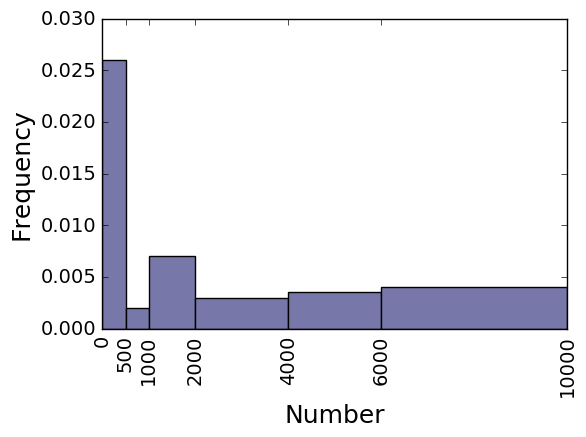

In [3]:
widths = boundaries[1:]-boundaries[:-1]
plt.bar(boundaries[:-1],frequency/widths,width=widths,color="#7777aa")
plt.xticks(boundaries,fontsize=14,rotation='vertical')
plt.yticks(fontsize=14)
plt.xlabel("Number",fontsize=18)
plt.ylabel("Frequency",fontsize=18)

### Part B
Cumulative Frequency.

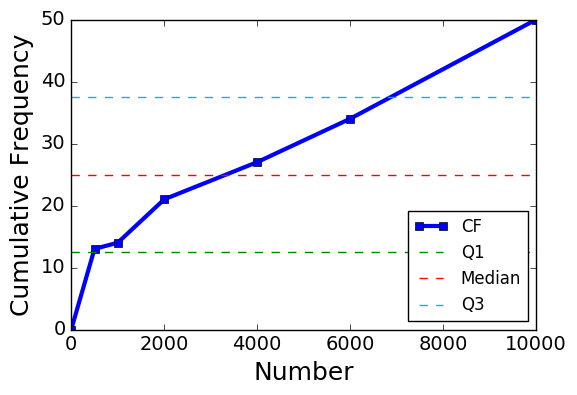

In [4]:
CF = np.cumsum(frequency)
CF.resize(len(CF)+1)
CF = np.roll(CF,1)
plt.plot(boundaries,CF,'-s',linewidth=3,label="CF")
plt.plot([0,10000],0.25*sum(frequency)*np.ones(2),'--',label="Q1")
plt.plot([0,10000],0.5*sum(frequency)*np.ones(2),'--',label="Median")
plt.plot([0,10000],0.75*sum(frequency)*np.ones(2),'--',label="Q3")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Number",fontsize=18)
plt.ylabel("Cumulative Frequency",fontsize=18)
plt.legend(loc='lower right')

### Part C
This is the different part from the previous problems. Here we calculate the grouped mean of the data.

In [5]:
midpoint = (boundaries[:-1]+boundaries[1:])/2.
mean = sum(frequency * midpoint)/sum(frequency)
print("Grouped Mean: {0:.2f}".format(mean))

Grouped Mean: 3910.00


Here, we can interpret the mean as the average amount held in reserve of the sample of 50 families.